In [2]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
# Check if the ntuple exists
file_path = Path("../data/trackingNtuple_10mu_10k_pt_0p5_50_5cm_cube.root")
if not file_path.exists():
    raise Exception(f"Where is the data??")

In [162]:
# Defining some branches
branch_names_ph2 = ["ph2_x", "ph2_y", "ph2_side"]
branch_names_pix = ["pix_x", "pix_y", "pix_side"]
branch_names_trk = ["trk_pt", "trk_eta", "trk_phi", "trk_q", "trk_dz", "trk_ndof", "trk_nPixel", "trk_nStrip"]
branch_names_sim = ["sim_pt", "sim_eta", "sim_phi", "sim_q", "sim_nLay", "sim_nPixel", "sim_nStrip", "sim_pdgId"]
branch_names_sht = ["simhit_x", "simhit_y", "simhit_z"]
branch_names_bsp = ["bsp_x", "bsp_y", "bsp_z"]

In [163]:
# Uproot the TTree
tree_name = "trackingNtuple/tree"
with uproot.open(f"{file_path.resolve()}:{tree_name}") as tree:
    print(tree)
    print(tree.keys())
    ph2 = tree.arrays(branch_names_ph2)
    pix = tree.arrays(branch_names_pix)
    trk = tree.arrays(branch_names_trk)
    sim = tree.arrays(branch_names_sim)
    sht = tree.arrays(branch_names_sht)
    bsp = tree.arrays(branch_names_bsp)

<TTree 'tree' (282 branches) at 0x00011d493350>
['event', 'lumi', 'run', 'trk_px', 'trk_py', 'trk_pz', 'trk_pt', 'trk_inner_px', 'trk_inner_py', 'trk_inner_pz', 'trk_inner_pt', 'trk_outer_px', 'trk_outer_py', 'trk_outer_pz', 'trk_outer_pt', 'trk_eta', 'trk_lambda', 'trk_cotTheta', 'trk_phi', 'trk_dxy', 'trk_dz', 'trk_dxyPV', 'trk_dzPV', 'trk_dxyClosestPV', 'trk_dzClosestPV', 'trk_ptErr', 'trk_etaErr', 'trk_lambdaErr', 'trk_phiErr', 'trk_dxyErr', 'trk_dzErr', 'trk_refpoint_x', 'trk_refpoint_y', 'trk_refpoint_z', 'trk_nChi2', 'trk_nChi2_1Dmod', 'trk_ndof', 'trk_mva', 'trk_qualityMask', 'trk_q', 'trk_nValid', 'trk_nLost', 'trk_nInactive', 'trk_nPixel', 'trk_nStrip', 'trk_nOuterLost', 'trk_nInnerLost', 'trk_nOuterInactive', 'trk_nInnerInactive', 'trk_nPixelLay', 'trk_nStripLay', 'trk_n3DLay', 'trk_nLostLay', 'trk_nCluster', 'trk_algo', 'trk_originalAlgo', 'trk_algoMask', 'trk_stopReason', 'trk_isHP', 'trk_seedIdx', 'trk_vtxIdx', 'trk_simTrkIdx', 'trk_simTrkShareFrac', 'trk_simTrkNChi2', 't

n(hits) = 1066711, n(barrel hits) = 323127


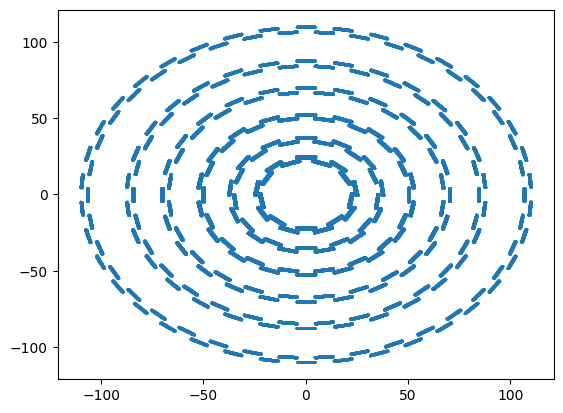

In [67]:
#
# ph2_* branches
#

# get flat barrel hits
flat_barrel = 3
mask = (ph2.ph2_side == flat_barrel)
n_el, n_true = len(ak.flatten(mask)), ak.sum(mask)
print(f"n(hits) = {n_el}, n(barrel hits) = {n_true}")

# plot flat barrel hits
fig, ax = plt.subplots()
_ = ax.scatter(ak.flatten(ph2.ph2_x[mask]), ak.flatten(ph2.ph2_y[mask]), s=0.1)

n(hits) = 1028714, n(barrel hits) = 198844


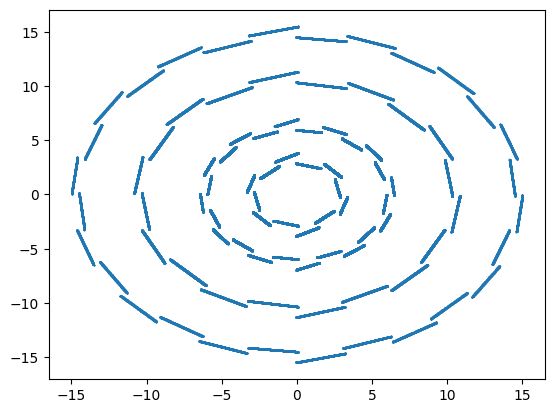

In [145]:
#
# pix_* branches
#

# get barrel hits
barrel_side = 0
mask = pix.pix_side == barrel_side
n_el, n_true = len(ak.flatten(mask)), ak.sum(mask)
print(f"n(hits) = {n_el}, n(barrel hits) = {n_true}")

# plot barrel hits
fig, ax = plt.subplots()
_ = ax.scatter(ak.flatten(pix.pix_x[mask]), ak.flatten(pix.pix_y[mask]), s=0.1)

n(hits) = 2344533, n(barrelish hits) = 244846


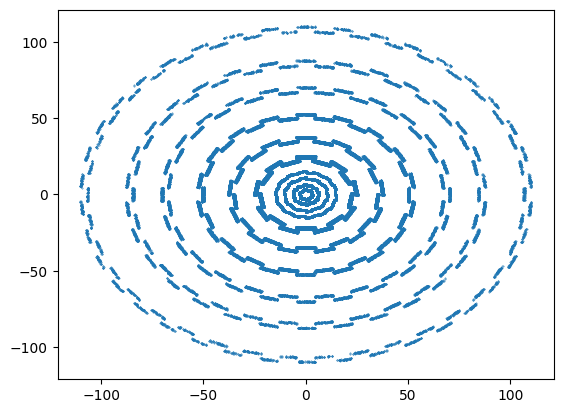

In [158]:
#
# simhit_* (sht) branches
#
zmax = 10
mask = (sht.simhit_z < zmax) & (sht.simhit_z > -zmax)
n_el, n_true = len(ak.flatten(mask)), ak.sum(mask)
print(f"n(hits) = {n_el}, n(barrelish hits) = {n_true}")

fig, ax = plt.subplots()
_ = ax.scatter(ak.flatten(sht.simhit_x[mask]), ak.flatten(sht.simhit_y[mask]), s=0.1)

x: [9.24e-06, 9.24e-06, 9.24e-06, 9.24e-06, ..., 9.24e-06, 9.24e-06, 9.24e-06]
y: [-2.45e-07, -2.45e-07, -2.45e-07, ..., -2.45e-07, -2.45e-07, -2.45e-07]
z: [9.24e-06, 9.24e-06, 9.24e-06, 9.24e-06, ..., 9.24e-06, 9.24e-06, 9.24e-06]


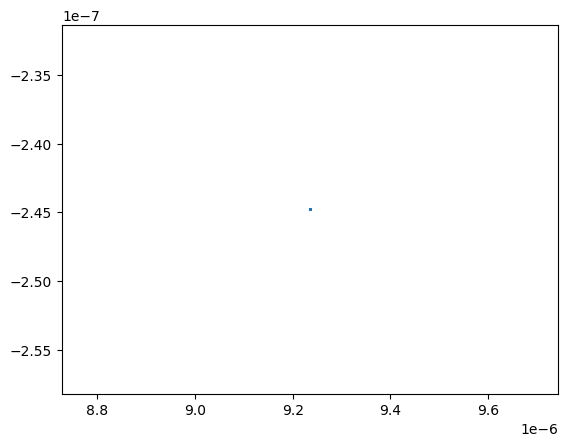

In [166]:
#
# bsp_* branches
#
print("x:", bsp.bsp_x)
print("y:", bsp.bsp_y)
print("z:", bsp.bsp_z)
fig, ax = plt.subplots()
_ = ax.scatter(bsp.bsp_x, bsp.bsp_y, s=0.1)

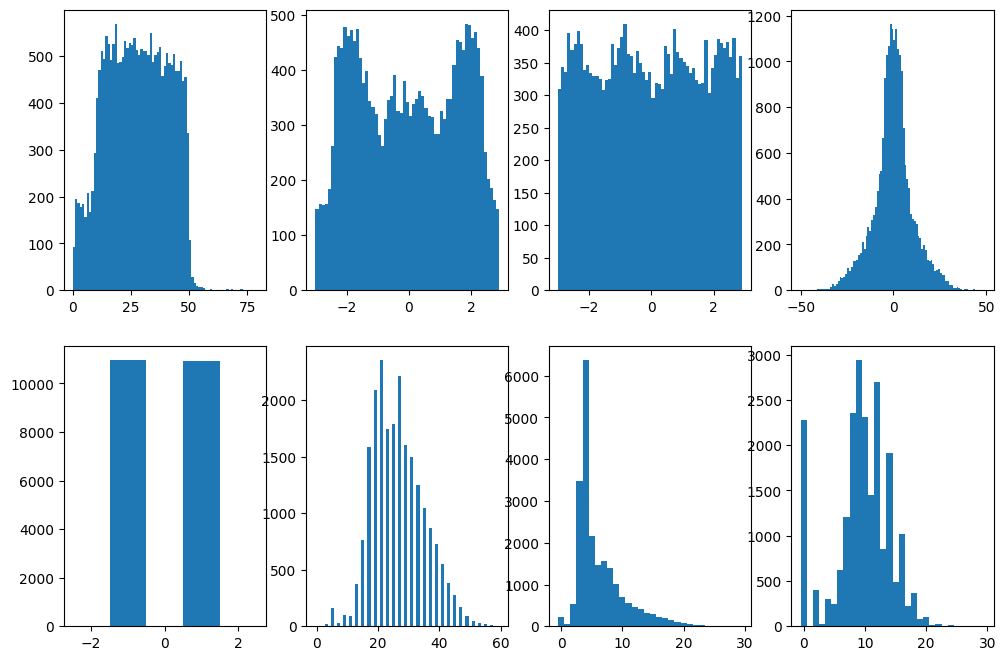

In [96]:
#
# trk_* branches
#
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
_ = ax[0][0].hist(ak.flatten(trk.trk_pt), bins=np.arange(0, 80, 1))
_ = ax[0][1].hist(ak.flatten(trk.trk_eta), bins=np.arange(-3, 3, 0.1))
_ = ax[0][2].hist(ak.flatten(trk.trk_phi), bins=np.arange(-3, 3, 0.1))
_ = ax[0][3].hist(ak.flatten(trk.trk_dz), bins=np.arange(-50, 50, 1))
_ = ax[1][0].hist(ak.flatten(trk.trk_q), bins=np.arange(-2.5, 3.5, 1))
_ = ax[1][1].hist(ak.flatten(trk.trk_ndof), bins=np.arange(-0.5, 60.5, 1))
_ = ax[1][2].hist(ak.flatten(trk.trk_nPixel), bins=np.arange(-0.5, 30.5, 1))
_ = ax[1][3].hist(ak.flatten(trk.trk_nStrip), bins=np.arange(-0.5, 30.5, 1))

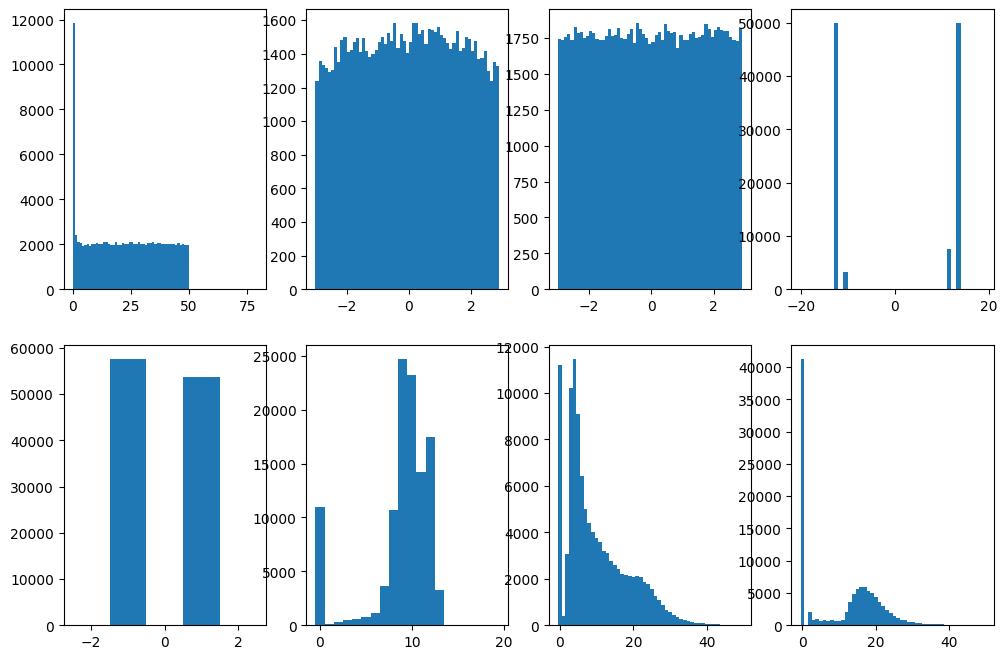

In [106]:
#
# sim_* branches
#
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
_ = ax[0][0].hist(ak.flatten(sim.sim_pt), bins=np.arange(0, 80, 1))
_ = ax[0][1].hist(ak.flatten(sim.sim_eta), bins=np.arange(-3, 3, 0.1))
_ = ax[0][2].hist(ak.flatten(sim.sim_phi), bins=np.arange(-3, 3, 0.1))
_ = ax[0][3].hist(ak.flatten(sim.sim_pdgId), bins=np.arange(-20, 20, 1))
_ = ax[1][0].hist(ak.flatten(sim.sim_q), bins=np.arange(-2.5, 3.5, 1))
_ = ax[1][1].hist(ak.flatten(sim.sim_nLay), bins=np.arange(-0.5, 20.5, 1))
_ = ax[1][2].hist(ak.flatten(sim.sim_nPixel), bins=np.arange(-0.5, 50.5, 1))
_ = ax[1][3].hist(ak.flatten(sim.sim_nStrip), bins=np.arange(-0.5, 50.5, 1))